In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df = pd.read_csv("data.csv")

In [2]:
df.insert(1, "order_count", 1, allow_duplicates=True)

In [3]:
df.head(100)


,order_id,order_count,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
0,236670,1,Wired Headphones,2,11.99,23.98,08/31/19,22,31,8,2019,Sat,359 Spruce St,Seattle,WA,98101,PM
1,236671,1,Bose SoundSport Headphones,1,99.99,99.99,08/15/19,15,15,8,2019,Thu,492 Ridge St,Dallas,TX,75001,PM
2,236672,1,iPhone,1,700.00,700.00,08/06/19,14,6,8,2019,Tue,149 7th St,Portland,OR,97035,PM
3,236673,1,AA Batteries (4-pack),2,3.84,7.68,08/29/19,20,29,8,2019,Thu,631 2nd St,Los Angeles,CA,90001,PM
4,236674,1,AA Batteries (4-pack),2,3.84,7.68,08/15/19,19,15,8,2019,Thu,736 14th St,New York City,NY,10001,PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,236762,1,AAA Batteries (4-pack),1,2.99,2.99,08/16/19,14,16,8,2019,Fri,632 Cherry St,San Francisco,CA,94016,PM
96,236763,1,Apple Airpods Headphones,1,150.00,150.00,08/06/19,10,6,8,2019,Tue,288 Lake St,Seattle,WA,98101,AM
97,236764,1,Bose SoundSport Headphones,1,99.99,99.99,08/22/19,15,22,8,2019,Thu,663 Elm St,Boston,MA,2215,PM
98,236765,1,Wired Headphones,1,11.99,11.99,08/24/19,10,24,8,2019,Sat,731 10th St,San Francisco,CA,94016,AM


### Q1. What is the 4th highest product sold in terms of total revenue generated overall ?

In [4]:

df.groupby('product').count()['total'].sort_values(ascending = False)
#The 4th highest item selling is AA Batteries (4-pack) with 20577 sales in total

product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: total, dtype: int64

### Q2. Which City sees the maximum number of orders being placed in the month of June 2019?

In [5]:
df_time = df[df['month'] == 6]
df_time = df_time[df['year'] == 2019]
df_time.groupby('city').count()['quantity'].sort_values(ascending = False)
#the city with the most orders being placed is San Francisco in June 2019

<ipython-input-5-6b35ab2ef7e3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_time = df_time[df['year'] == 2019]


city
San Francisco    3303
Los Angeles      2203
New York City    1775
Boston           1390
Atlanta          1107
Dallas           1063
Seattle          1056
Portland          942
Austin            715
Name: quantity, dtype: int64

### Q3. What is the least popular product in terms of unique orders in the city of Los Angeles. ?

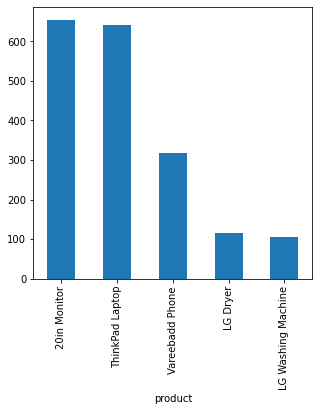

In [6]:
df_los = df[df['city'] == 'Los Angeles']
df_los.groupby('product').count()['quantity'].sort_values(ascending = False).tail().plot.bar(figsize = (5,5))
#Seems like LG Washing Machine has the least unique orders overall

### Q4. Which state has the highest revenue generated from all the apple products in year 2019?  Hint { Apple products : Apple airpods, iphone, Macbook} 


In [7]:
df_apple_2019 = df[(df['year'] ==2019) & ((df['product'] == "iPhone") |(df['product'] == "iPhone")|(df['product'] == "Apple Airpods Headphones")|(df['product'] == "Macbook Pro Laptop"))]

df_apple_2019.groupby('state').count()['total'].sort_values(ascending = False)

state
CA    10815
NY     3615
TX     3597
MA     2872
GA     2184
WA     2151
OR     1504
ME      370
Name: total, dtype: int64

### Q5. What is the difference of revenue generated between weekend and weekday in the state of CA ? Hint { Weekday : Mon – Thu, Weekend : Fri – Sun}

In [22]:
df_CA = df[df['state'] == 'CA']
df_CA_weekend = df_CA[(df_CA['day'] == 'Fri')|(df_CA['day'] == 'Sat')|(df_CA['day'] == 'Sun')]
df_CA_weekday = df_CA[(df_CA['day'] == 'Mon')|(df_CA['day'] == 'Tue')|(df_CA['day'] == 'Wed')|(df_CA['day'] == 'Thu')]
df_CA_weekend_sum = df_CA_weekend['total'].sum()
df_CA_weekday_sum = df_CA_weekday['total'].sum()
difference = df_CA_weekend_sum - df_CA_weekday_sum
print(df_CA_weekend_sum)
print(df_CA_weekday_sum)
print(difference)
#there's $-2,116,605 revenue difference between weekend and weekday

5799084.76
7915689.949999999
-2116605.1899999995


### Q6. Which city has seen the overall least orders in night hours in the months of May, June and July 2019. Hint { Night Hours : 18 – 24 } 


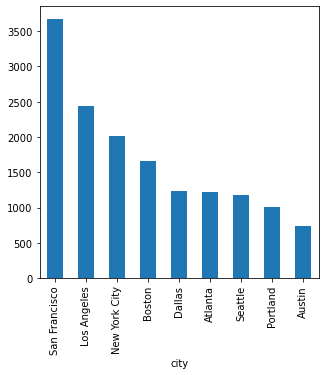

In [40]:
#1. Filter out all information from May-July in 2019 and then filter from 18-24 hours range
df_2019 = df[df['year'] == 2019]
df_may_to_july = df_2019[((df_2019['month']>= 5) & (df_2019['month'] <= 7))]
df_may_to_july_night = df_may_to_july[(df_may_to_july['hour'] >= 18) & (df_may_to_july['hour']<= 24)]

#2. Use count number of ID and group based on city to filter the rest of the info out
df_may_to_july_night.groupby('city').count()['order_id'].sort_values(ascending = False).plot.bar(figsize = (5,5))

#Conclusion: San Francisco has most orders compare to others

### Q7. Is “Google Phone” better performing in respect to overall number of orders placed as well as  revenue generated than “iphone” in “New York City” ?

In [70]:
# analysis
#1. Main question: Google vs iPhone in:
#    + Order counts
#    + Revenue aka total sum in
# solution
#1. Filter google and iphone specificially in the name
df_phone = df[(df['product']=='iPhone')|(df['product']=='Google Phone')]

#2. Make separate comparisons by groupby counts and order id
df_phone.groupby('product').count()['order_id'].sort_values(ascending = False)
#iPhone wins in number of orders 

product
iPhone          6842
Google Phone    5525
Name: order_id, dtype: int64

In [68]:
df_google_sum = df_phone[(df_phone['product'] == 'Google Phone')]['total'].sum()

#should be accurate since there're 5k rows and it's 600 usd per phone so estimation is correct for google phone
df_iphone_sum = df_phone[(df_phone['product'] == 'iPhone')]['total'].sum()
print("Google creates $", df_google_sum, "while iPhone creates $", df_iphone_sum)
#Iphone wins in revenue
#IPhone is better in this case

Google creates $ 3319200.0 while iPhone creates $ 4794300.0


### Q8. What is the absolute difference in total number of unique orders being created in the cities of “Boston” and “Portland” for the month of Jan in both years 2019 & 2020 ?


In [77]:
#unique orders in 2 cities: Boston and Portland
#time range: Jan 2019 and Jan 2020
#Main question: find abs[Boston.order_id.count - Portland.order_id.count]

#1. filter 2 cities with time range out
df_boston = df[(df['city']== 'Boston')&(df['month']==1)]
df_portland = df[(df['city']== 'Portland')&(df['month']==1)]
abs(df_boston.count()['order_id']-df_portland.count()['order_id'])
#There're 426 n.order differences between Boston and Portland

426

### Q9. Plot pie chart for 4 categories based on their total revenue generated.  Weekend-Day , Weekend-Night, Weekday-Day, Weekday-Night.  Hint {Weekend/Weekday , Day/Night logic remains as earlier discussed}


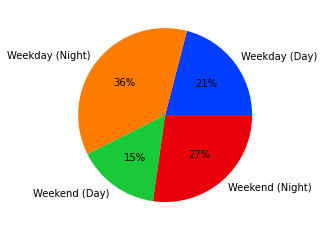

In [115]:
#filter weekday and weekend
df_weekday = df[(df['day']=='Mon')|(df['day']=='Tue')|(df['day']=='Wed')|(df['day']=='Thu')]
df_weekend = df[(df['day']=='Fri')|(df['day']=='Sat')|(df['day']=='Sun')]

#filter day and night revenue
df_weekday_day = df_weekday[(df_weekday['timezone']=="AM")]['total'].sum()
df_weekday_night = df_weekday[df_weekday['timezone']=="PM"]['total'].sum()

df_weekend_day = df_weekend[df_weekend['timezone']== "AM"]['total'].sum()
df_weekend_night = df_weekend[df_weekend['timezone']== "PM"]['total'].sum()

#create empty list to add revenue in
revenue = [df_weekday_day, df_weekday_night, df_weekend_day, df_weekend_night]
#create pie chart
categories = ['Weekday (Day)', 'Weekday (Night)', 'Weekend (Day)', 'Weekend (Night)']
palette_color = sns.color_palette('bright')
plt.pie(revenue, labels=categories, colors=palette_color, autopct='%.0f%%')
# displaying chart
plt.show()
#Weekday Night gives most revenue compare to the rest

# Q10. Plot violin plot between above respective 13 categories of unique year month combinations Month_Year ( 1_2019 , 2_2019 …. 1_2020) along side the number of orders being placed. Write down  the inferences according to the graph. (minimum 5)

In [28]:
#Plot violin plot with x = month_year and y = number of orders
#combine month and year and insert in dataframe first
df['Month_Year']= df['month'].astype(str)+ "_" + df['year'].astype(str)

#Create violin plot with number orders in mind
df1  = df.groupby('Month_Year').count()['order_id'].sort_values(ascending = True)
df1


Month_Year
10_2019    20282
11_2019    17573
12_2019    24984
1_2019      9675
1_2020        34
2_2019     11975
3_2019     15153
4_2019     18279
5_2019     16566
6_2019     13554
7_2019     14293
8_2019     11961
9_2019     11621
Name: order_id, dtype: int64

In [26]:

#Create 2 separated keys and values indices
keys = df1.keys()
values = []

print(keys)
for i in range(0, len(df1)-1):
    values.append(df1[i])
print(values)
#Group these 2 values in a new dataframe
data = {'Month_Year': ['12_2019', '10_2019', '4_2019', '11_2019', '5_2019', '3_2019', '7_2019','6_2019', '2_2019', '8_2019', '9_2019', '1_2019', '1_2020'], 'Order_Count': [24984, 20282, 18279, 17573, 16566, 15153, 14293, 13554, 11975, 11961, 11621, 9675,34]}
newdf = pd.DataFrame(data)
newdf
#Create a new dataframe out of these 2 only

Index(['1_2020', '1_2019', '9_2019', '8_2019', '2_2019', '6_2019', '7_2019',
       '3_2019', '5_2019', '11_2019', '4_2019', '10_2019', '12_2019'],
      dtype='object', name='Month_Year')
[34, 9675, 11621, 11961, 11975, 13554, 14293, 15153, 16566, 17573, 18279, 20282]


,Month_Year,Order_Count
0,12_2019,24984
1,10_2019,20282
2,4_2019,18279
3,11_2019,17573
4,5_2019,16566
5,3_2019,15153
6,7_2019,14293
7,6_2019,13554
8,2_2019,11975
9,8_2019,11961


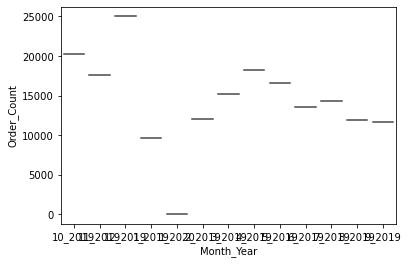

In [27]:
sns.violinplot(x='Month_Year', y='Order_Count', data=newdf)

In [29]:

#Obs 1: most orders are made near the end of the year
#Obs 2: least orders are made in Jan_2020
#Obs 3: Beginning of each year has least orders
#Obs 4: There are 2 spikes which is near the mid-year and end-year
#Obs 5: Possibily number of orders are high due to it's season break time (summer vacation and christmas vacation)